# <span style = "color:green"> LSTM </span>

***

### Import Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import re
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Read the dataset

In [3]:
df=pd.read_csv('movie_data.csv')[0:1000]

In [4]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


### Print some of the texts along with its emotions

In [5]:
for i in range(5):
    print(df['review'][i],'-----',df['sentiment'][i])
    print()

This movie is just crap. Even though the directors claim to be part of that oi-culture, it's still a very, very bad directorial debut. The topic itself is very interesting and I accept the bad acting due to the fact, that they are all amateurs and never acted before, but the worst thing about this film are the dialogs and very unexperienced and naive directing. There's no timing at all in that movie. I felt like the directors were so exited to do that movie (it's their first feature), that they actually never really asked themselves, what story they wanna tell. I met Ben (one of the directors) on several occasions and he's a nice and thoughtful guy, but that doesn't make him a director. I think, that "American History X" is full of clichÃ©s, but somehow manages to transport a story. "Oi!Warning" is full of clichÃ©s, doesn't tell anything new or provocative and (-that's the sad thing about this movie) it's far from any Oi!-Reality.<br /><br />If you wanna see weird but great German film

### View info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [7]:
df.describe()

,sentiment
count,1000.000000
mean,0.501000
std,0.500249
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Check for null values

In [8]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

### Check for duplicated values

In [9]:
df.duplicated().sum()

0

### Plot a countplot of 'Emotions'

<Axes: xlabel='count', ylabel='sentiment'>

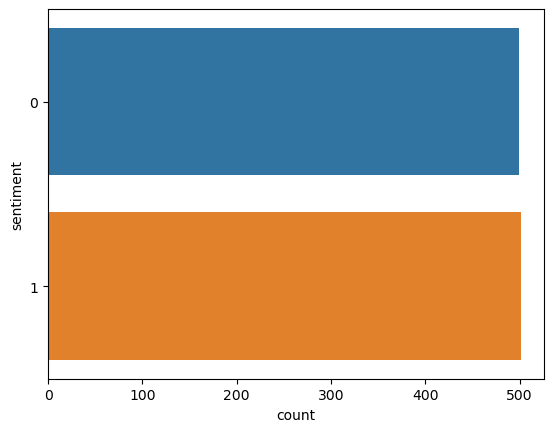

In [10]:
sns.countplot(y=df['sentiment'])

### Create a function to preprocess the text

In [11]:
from nltk.corpus import stopwords

In [12]:
def preprocess(t):
    txt=re.sub(r"[^a-zA-Z0-9]",' ',t).split()
    txt=[i.lower() for i in txt if i not in stopwords.words('english')]
    lemma=WordNetLemmatizer()
    word=[lemma.lemmatize(word,'v') for word in txt]
    word=' '.join(word)
    return word
    

### Apply the function on Text column

In [13]:
df['review']=df['review'].apply(preprocess)

### Print some of the texts after the preprocess

In [14]:
for i in range(5):
    print(df['review'][i],'---',df['sentiment'][i])
    print()

this movie crap even though directors claim part oi culture still bad directorial debut the topic interest i accept bad act due fact amateurs never act worst thing film dialogs unexperienced naive direct there time movie i felt like directors exit movie first feature actually never really ask story wanna tell i meet ben one directors several occasion nice thoughtful guy make director i think american history x full clich somehow manage transport story oi warn full clich tell anything new provocative sad thing movie far oi reality br br if wanna see weird great german film watch movies michael haneke christoph schlingensief oskar roehler hans weingartner oliver hirschbiegel br br benny video funny game die unber hrbare mein letzter film das experiment das weisse rauschen muxm uschenstill br br ten topic photography --- 0

another detail work subject dr dwivedi take us back time pre partioned panjab dr dwivedi choose difficult subject movie debut he work meticulous detail bring story lif

### Split the dataset into Input and Target Variables

In [15]:
X=df['review']
y=df['sentiment']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### Convert text to Sequence and add padding

In [17]:
token=Tokenizer(num_words=5000)


In [18]:
token.fit_on_texts(X)

In [19]:
vocab=len(token.word_index)+1

#### "fit_on_texts" - This method creates the vocabulary index based on word frequency. Each word gets a unique id

In [20]:
def enco(x):
    en=token.texts_to_sequences(x)
    pad=pad_sequences(en,maxlen=128)
    return pad
    

### Apply the function on both Training and Testing set

In [21]:
X_train=enco(X_train)
X_test=enco(X_test)

### Create a keras Sequential model with LSTM Layers

In [22]:
from tensorflow.keras import Sequential,layers

In [23]:
model=Sequential([
    layers.Embedding(vocab,128),
    layers.LSTM(128,return_sequences=True),
    layers.Dropout(0.2),
    
    layers.LSTM(128),
    layers.Dropout(0.2),
    
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1,activation='sigmoid')
])

### Compile the model

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model

In [25]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10


24/24 [==============================] - 17s 369ms/step - loss: 0.6927 - accuracy: 0.5329 - val_loss: 0.6903 - val_accuracy: 0.5000
Epoch 2/10
24/24 [==============================] - 7s 295ms/step - loss: 0.5540 - accuracy: 0.7711 - val_loss: 0.5034 - val_accuracy: 0.7000
Epoch 3/10
24/24 [==============================] - 7s 291ms/step - loss: 0.1449 - accuracy: 0.9539 - val_loss: 0.5786 - val_accuracy: 0.7750
Epoch 4/10
24/24 [==============================] - 8s 336ms/step - loss: 0.0399 - accuracy: 0.9895 - val_loss: 0.6989 - val_accuracy: 0.7500
Epoch 5/10
24/24 [==============================] - 8s 314ms/step - loss: 0.0222 - accuracy: 0.9947 - val_loss: 0.8282 - val_accuracy: 0.7250
Epoch 6/10
24/24 [==============================] - 7s 285ms/step - loss: 0.0238 - accuracy: 0.9961 - val_loss: 1.2774 - val_accuracy: 0.7500
Epoch 7/10
24/24 [==============================] - 7s 301ms/step - loss: 0.0145 - accuracy: 0.9947 - val_loss: 1.4457 - val_accuracy: 0.7250
Epo

### Make Prediction with X_test

In [31]:
y_pred=model.predict(X_test)

7/7 [==============================] - 2s 73ms/step


### Model Evaluation

In [32]:
model.evaluate(X_train,y_train)

25/25 [==============================] - 2s 78ms/step - loss: 0.0749 - accuracy: 0.9887


[0.0748838409781456, 0.9887499809265137]

#### Accuracy score

In [36]:
y_pred=[np.argmax(i) for i in y_pred]

In [37]:
y_test

249    0
353    1
537    0
424    1
564    0
      ..
684    0
644    0
110    0
28     1
804    0
Name: sentiment, Length: 200, dtype: int64

In [38]:
metrics.accuracy_score(y_test,y_pred)

0.48

### Confusion Matrix

<Axes: >

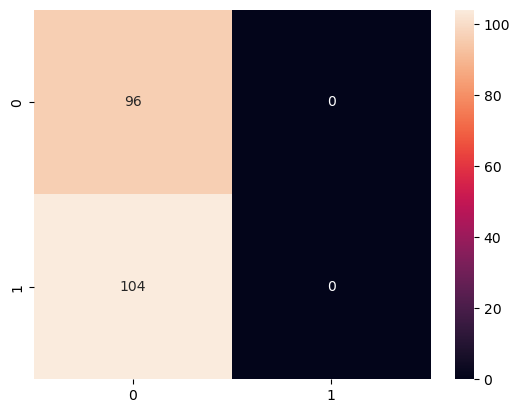

In [41]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Classification report

In [42]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        96
           1       0.00      0.00      0.00       104

    accuracy                           0.48       200
   macro avg       0.24      0.50      0.32       200
weighted avg       0.23      0.48      0.31       200



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
